
# 📘 Simple Linear Regression Project  
## مقدمه | Introduction  
This notebook demonstrates how to perform simple linear regression using Python and scikit-learn.

در این نوت‌بوک، رگرسیون خطی ساده با استفاده از پایتون و کتابخانه Scikit-learn آموزش داده می‌شود.



## 📦 Importing Required Libraries  
We begin by importing necessary libraries:  
- `matplotlib.pyplot` for plotting  
- `numpy` for numerical operations  
- `pandas` for data manipulation  

در ابتدا کتابخانه‌های مورد نیاز را وارد می‌کنیم:
- `matplotlib.pyplot` برای رسم نمودارها  
- `numpy` برای عملیات عددی  
- `pandas` برای خواندن و پردازش داده‌ها  


In [4]:
# Importing libraries for visualization, computation, and data handling
# Import kardan ketabkhaneha baraye plot keshidan, mohasebat va kar ba data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


## 📄 Loading the Dataset  
We load the fuel consumption dataset using `pandas.read_csv()`.  
This dataset contains fuel usage and CO2 emissions data for various vehicles.

در این بخش، دیتاست مربوط به مصرف سوخت و تولید CO2 را با استفاده از `pandas` بارگذاری می‌کنیم.


In [5]:
# Read dataset from CSV file into a pandas DataFrame
# Khandan data az file CSV va tabdil be DataFrame
df=pd.read_csv('C:/Users/omen/Downloads/Video/asset/machine_learning_with_python_jadi-main/machine_learning_with_python_jadi-main/FuelConsumption.csv')
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


<function matplotlib.pyplot.show(close=None, block=None)>

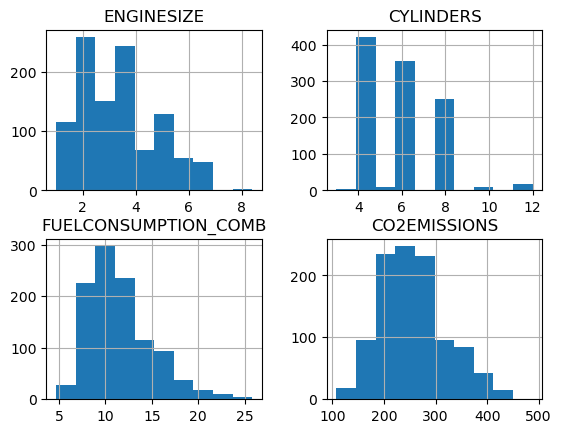

In [7]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz=cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show

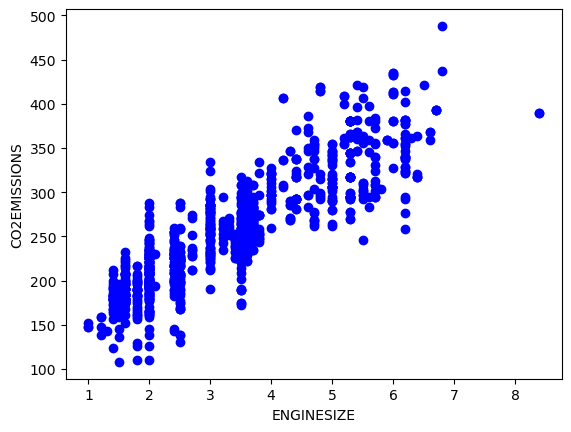

In [8]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='b')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()


In [9]:
msk=np.random.rand(len(df))<0.8
train=cdf[msk]
test=cdf[~msk]

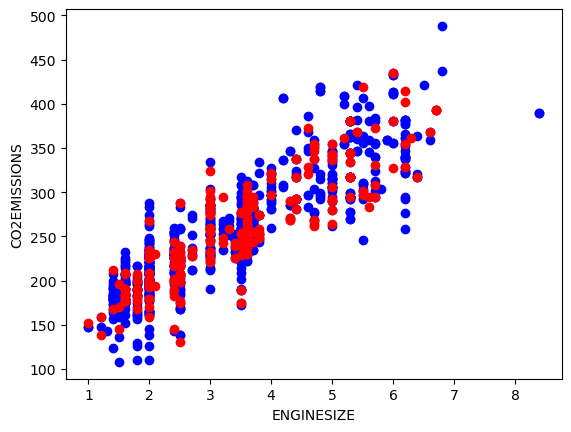

In [10]:
fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.scatter(train['ENGINESIZE'],train['CO2EMISSIONS'],color='b')
ax1.scatter(test['ENGINESIZE'],test['CO2EMISSIONS'],color='r')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [11]:
from sklearn import linear_model 
reg = linear_model.LinearRegression()
x1=np.asanyarray(train[['ENGINESIZE']])
y1=np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(x1,y1)
reg.coef_

array([[38.95376278]])

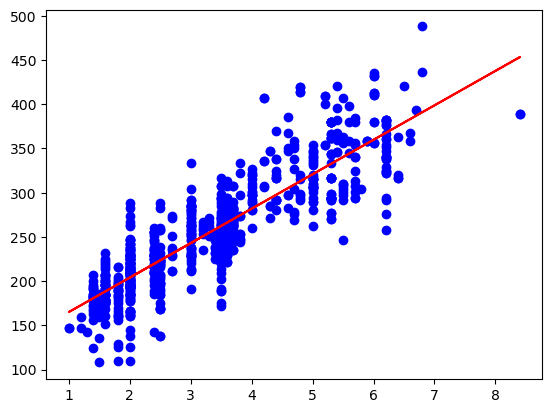

In [12]:
plt.scatter(train['ENGINESIZE'],train['CO2EMISSIONS'],color='b')
plt.plot(x1,reg.coef_[0][0]*x1+reg.intercept_,'-r')

In [13]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])
test_y_=reg.predict(test_x)
print('R2 Score : %.2f'%r2_score(test_y,test_y_))

R2 Score : 0.78
